# Split data 7-3

In [40]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('../FPT.csv')
data

,time,open,high,low,close,volume
0,2019-03-01,19296.671875,19318.330078,19123.414063,19318.330078,1410097.0
1,2019-03-04,19318.330078,19578.216797,19318.330078,19491.587891,1931839.0
2,2019-03-05,19491.587891,19578.216797,19404.958984,19448.273438,1903047.0
3,2019-03-06,19469.929688,19534.902344,19253.357422,19318.330078,1605064.0
4,2019-03-07,19318.330078,19491.587891,19318.330078,19383.300781,864232.0
...,...,...,...,...,...,...
1318,2024-06-10,124781.859375,126086.203125,124347.078125,125216.640625,4341736.0
1319,2024-06-11,125478.257813,127391.304688,124434.781250,127391.304688,9681274.0
1320,2024-06-12,127900.000000,132700.000000,127800.000000,132000.000000,11215500.0
1321,2024-06-13,133700.000000,133800.000000,130000.000000,130000.000000,8676200.0


In [41]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [42]:
# 2. Đọc file dữ liệu chứng khoán FPT và chia train test validate theo tỉ lệ 7:3
df = data
df['time'] = pd.to_datetime(df['time'])
df = df[['close', 'time']]
df = df.dropna() # Drop missing values
df.set_index('time', inplace=True)
#df = df.reset_index(drop=True) # Reset the index

# Split the data into training and testing sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [43]:
pip install pmdarima

In [44]:
df

,close
time,
2019-03-01,19318.330078
2019-03-04,19491.587891
2019-03-05,19448.273438
2019-03-06,19318.330078
2019-03-07,19383.300781
...,...
2024-06-10,125216.640625
2024-06-11,127391.304688
2024-06-12,132000.000000


In [45]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15084.307, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15083.812, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15085.652, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15085.628, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15083.812, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15086.380, Time=0.82 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.131 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [46]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

In [47]:
import datetime

In [48]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
next_30_days = [last_index + datetime.timedelta(days=i+1) for i in range(30)]
x_next_30_days =  np.array(next_30_days).reshape(-1, 1)
last_data = pd.Index(next_30_days)

# Predict the closing prices for the next 30 days

y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[55464.36662771 55503.40122441 55542.43582112 55581.47041782
 55620.50501453 55659.53961124 55698.57420794 55737.60880465
 55776.64340135 55815.67799806 55854.71259477 55893.74719147
 55932.78178818 55971.81638488 56010.85098159 56049.8855783
 56088.920175   56127.95477171 56166.98936841 56206.02396512
 56245.05856182 56284.09315853 56323.12775524 56362.16235194
 56401.19694865 56440.23154535 56479.26614206 56518.30073877
 56557.33533547 56596.36993218]


In [49]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 19840.232380229572


Testing RMSE: 19840.232380229572


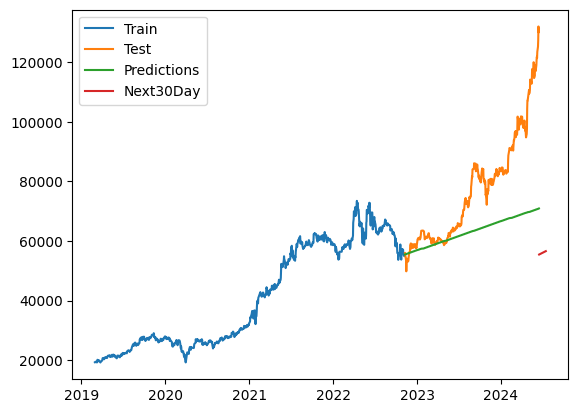

In [50]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [51]:
test_data.index

DatetimeIndex(['2022-11-09', '2022-11-10', '2022-11-11', '2022-11-14',
               '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
               '2022-11-21', '2022-11-22',
               ...
               '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06',
               '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14'],
              dtype='datetime64[ns]', name='time', length=397, freq=None)

In [52]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# Tính MSLE
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)
print('Testing MSLE:', test_msle)

Testing RMSE: 19840.232380229572
Testing MAPE: 15.540556945770573
Testing MDA: 51.26262626262626
Testing MSLE: 0.05592697841632498


# Split data 8:2

In [53]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('../FPT.csv')
data

,time,open,high,low,close,volume
0,2019-03-01,19296.671875,19318.330078,19123.414063,19318.330078,1410097.0
1,2019-03-04,19318.330078,19578.216797,19318.330078,19491.587891,1931839.0
2,2019-03-05,19491.587891,19578.216797,19404.958984,19448.273438,1903047.0
3,2019-03-06,19469.929688,19534.902344,19253.357422,19318.330078,1605064.0
4,2019-03-07,19318.330078,19491.587891,19318.330078,19383.300781,864232.0
...,...,...,...,...,...,...
1318,2024-06-10,124781.859375,126086.203125,124347.078125,125216.640625,4341736.0
1319,2024-06-11,125478.257813,127391.304688,124434.781250,127391.304688,9681274.0
1320,2024-06-12,127900.000000,132700.000000,127800.000000,132000.000000,11215500.0
1321,2024-06-13,133700.000000,133800.000000,130000.000000,130000.000000,8676200.0


In [54]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [55]:
# 2. Đọc file dữ liệu chứng khoán FPT và chia train test validate theo tỉ lệ 7:1.5:1
df = data
df['time'] = pd.to_datetime(df['time'])
df = df[['close', 'time']]
df = df.dropna() # Drop missing values
df.set_index('time', inplace=True)
#df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [56]:
!pip install pmdarima

In [57]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17207.142, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17208.963, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17210.770, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17210.736, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17209.410, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17205.720, Time=0.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17204.235, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=17204.852, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17207.877, Time=3.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=17205.630, Time=2.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=17205.172, Time=0.28 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 9.642 seconds


ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True)

In [58]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

In [59]:
import datetime

In [60]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
next_30_days = [last_index + datetime.timedelta(days=i+1) for i in range(30)]
x_next_30_days =  np.array(next_30_days).reshape(-1, 1)
last_data = pd.Index(next_30_days)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[61550.27125793 61643.74991105 61687.64686918 61731.54382731
 61775.44078544 61819.33774356 61863.23470169 61907.13165982
 61951.02861794 61994.92557607 62038.8225342  62082.71949232
 62126.61645045 62170.51340858 62214.41036671 62258.30732483
 62302.20428296 62346.10124109 62389.99819921 62433.89515734
 62477.79211547 62521.6890736  62565.58603172 62609.48298985
 62653.37994798 62697.2769061  62741.17386423 62785.07082236
 62828.96778048 62872.86473861]


In [61]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 22691.5253317803


Testing RMSE: 22691.5253317803


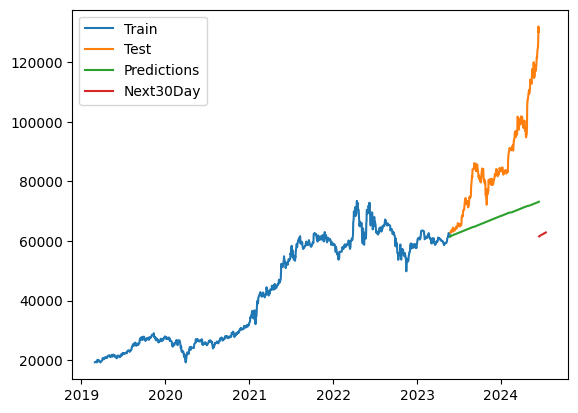

In [62]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [63]:
test_data.index

DatetimeIndex(['2023-05-25', '2023-05-26', '2023-05-29', '2023-05-30',
               '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-05',
               '2023-06-06', '2023-06-07',
               ...
               '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06',
               '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14'],
              dtype='datetime64[ns]', name='time', length=265, freq=None)

In [64]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# Tính MSLE
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)
print('Testing MSLE:', test_msle)

Testing RMSE: 22691.5253317803
Testing MAPE: 19.74812747315503
Testing MDA: 53.78787878787878
Testing MSLE: 0.07018539534318448


# Split data 9 : 1

In [65]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('../FPT.csv')
data

,time,open,high,low,close,volume
0,2019-03-01,19296.671875,19318.330078,19123.414063,19318.330078,1410097.0
1,2019-03-04,19318.330078,19578.216797,19318.330078,19491.587891,1931839.0
2,2019-03-05,19491.587891,19578.216797,19404.958984,19448.273438,1903047.0
3,2019-03-06,19469.929688,19534.902344,19253.357422,19318.330078,1605064.0
4,2019-03-07,19318.330078,19491.587891,19318.330078,19383.300781,864232.0
...,...,...,...,...,...,...
1318,2024-06-10,124781.859375,126086.203125,124347.078125,125216.640625,4341736.0
1319,2024-06-11,125478.257813,127391.304688,124434.781250,127391.304688,9681274.0
1320,2024-06-12,127900.000000,132700.000000,127800.000000,132000.000000,11215500.0
1321,2024-06-13,133700.000000,133800.000000,130000.000000,130000.000000,8676200.0


In [66]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [67]:
# 2. Đọc file dữ liệu chứng khoán FPT và chia train test validate theo tỉ lệ 9:1
df = data
df['time'] = pd.to_datetime(df['time'])
df = df[['close', 'time']]
df = df.dropna() # Drop missing values
df.set_index('time', inplace=True)
#df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
# Split the data into training and testing sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [68]:
pip install pmdarima

In [69]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19465.778, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19462.868, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19464.807, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19464.804, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19464.885, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19466.449, Time=0.86 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.999 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [70]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

In [71]:
import datetime

In [72]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
next_30_days = [last_index + datetime.timedelta(days=i+1) for i in range(30)]
last_data = pd.Index(next_30_days)
x_next_30_days =  np.array(next_30_days).reshape(-1, 1)
# Predict the closing prices for the next 30 days

y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[79267.76830418 79318.14598336 79368.52366254 79418.90134173
 79469.27902091 79519.65670009 79570.03437927 79620.41205845
 79670.78973763 79721.16741682 79771.545096   79821.92277518
 79872.30045436 79922.67813354 79973.05581272 80023.43349191
 80073.81117109 80124.18885027 80174.56652945 80224.94420863
 80275.32188781 80325.699567   80376.07724618 80426.45492536
 80476.83260454 80527.21028372 80577.5879629  80627.96564209
 80678.34332127 80728.72100045]


In [73]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 19134.688460461934


Testing RMSE: 19134.688460461934


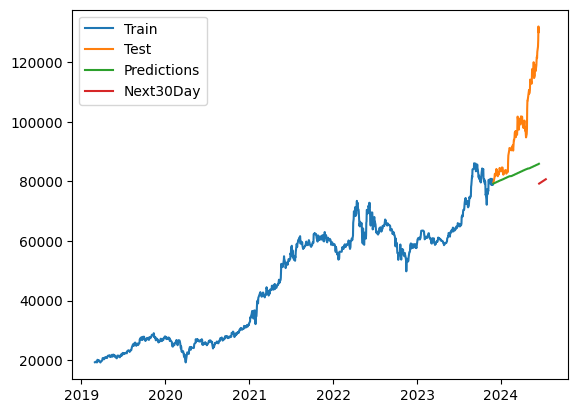

In [74]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [75]:
test_data.index

DatetimeIndex(['2023-11-29', '2023-11-30', '2023-12-01', '2023-12-04',
               '2023-12-05', '2023-12-06', '2023-12-07', '2023-12-08',
               '2023-12-11', '2023-12-12',
               ...
               '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06',
               '2024-06-07', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14'],
              dtype='datetime64[ns]', name='time', length=133, freq=None)

In [76]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# Tính MSLE
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)
print('Testing MSLE:', test_msle)

Testing RMSE: 19134.688460461934
Testing MAPE: 13.817392784576516
Testing MDA: 56.060606060606055
Testing MSLE: 0.03773552309304584
